First step is to find a gaussian fit for the data. This fit will have to be shifted up with a constant B, to count for the background data. It will give the number of events that are in the peak

In [1]:
#Imports
import numpy as np
from scipy.integrate import quad
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import interactive

interactive(True)

#Load in the data - May want to add try/catch block
data = np.loadtxt('../data/test_data_two_peaks_B.dat',)
#Load Columns
day = data[:,0]
energy = data[:,1]
riseTime = data[:,2]

#Isolated the background data to find mean. This mean will be the B constant in the gaussian fit 
background = np.array([])
for i in energy:
    if(i<9.5 or i>10.5):
        background = np.append(background, [i])

    
B = np.mean(background)
        
plt.hist(energy, bins =100)
plt.axhline(y=B, color='r', linestyle='-')
plt.title("Energy Distribution Showing B")
plt.ylabel("Count")
plt.xlabel("Energy")
plt.show()


print(B)

<Figure size 640x480 with 1 Axes>

9.980590312667566


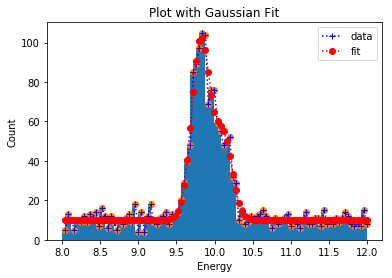

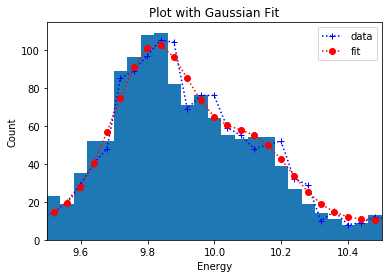

Gaussian information:
      G1(x) =  40.337351*exp(-(x-10.118396)**2/(2*0.114223**2)) + 10.120002
       Where the Amplitude = 40.337351 +/- 3.400427
       Where the Mean = 10.118396 +/- 0.021572
       Where the Standard Deviation = 0.114223 +/- 0.015735
       Where the Constant B = 10.120002 +/- 0.475287

      G2(x) =  91.351383*exp(-(x-9.820614)**2/(2*-0.121965**2)) + 10.120002
       Where the Amplitude = 91.351383 +/- 2.947219
       Where the Mean = 9.820614 +/- 0.010099
       Where the Standard Deviation = -0.121965 +/- 0.007612
       Where the Constant B = 10.120002 +/- 0.475287


In [2]:
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

y, x, _ = plt.hist(energy,bins=100)


x = x[1:] 


n = len(energy)                     #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

plt.plot(x, y, 'o')

def gaus(x,a0,x00,sigma0,a1,x10,sigma1, B):
    return a0*exp((-(x-x00)**2)/(2*(sigma0**2))) + a1*exp((-(x-x10)**2)/(2*(sigma1**2))) + B

popt,pcov = curve_fit(gaus,x,y,p0=[1,9.8,.4, 1, 10.15, .1, B])
yGauss = gaus(x,*popt)
perr = np.sqrt(np.diag(pcov))

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.title("Plot with Gaussian Fit")
plt.xlabel('Energy')
plt.ylabel('Count')
plt.show()

plt.hist(energy, range = [9.5, 10.5], bins = 25)
plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.xlim([9.5, 10.5])
plt.legend()
plt.title("Plot with Gaussian Fit")
plt.xlabel('Energy')
plt.ylabel('Count')
plt.show()


print("Gaussian information:")
print("      G1(x) =  %f*exp(-(x-%f)**2/(2*%f**2)) + %f" %(popt[0], popt[1], popt[2], popt[6]))
print("       Where the Amplitude = %f +/- %f" %(popt[0], perr[0]))
print("       Where the Mean = %f +/- %f" %(popt[1], perr[1]))
print("       Where the Standard Deviation = %f +/- %f" %(popt[2], perr[2]))
print("       Where the Constant B = %f +/- %f" %(popt[6], perr[6]))
print("")
print("      G2(x) =  %f*exp(-(x-%f)**2/(2*%f**2)) + %f" %(popt[3], popt[4], popt[5], popt[6]))
print("       Where the Amplitude = %f +/- %f" %(popt[3], perr[3]))
print("       Where the Mean = %f +/- %f" %(popt[4], perr[4]))
print("       Where the Standard Deviation = %f +/- %f" %(popt[5], perr[5]))
print("       Where the Constant B = %f +/- %f" %(popt[6], perr[6]))


The desired value is the area under the curve of the Gaussian. This is the total number of events observed. There are two possible ways to obtain this; Count the bins that are within the curve, Integrate the  Guassian from the beginning of the peak to the end

In [17]:
#Adding the bins - as simple as looping through the events from 9.5 to 10.5, adding them, and subtracting the background


#Using the quad method from the scipy.integrate class, 
#the previosuly defined gaus function can be passed in and the integral is solved


I = quad(gaus, 9.5, 10.5, args=(popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6]))

numEvents = I[0]/.04

print("The integral of the peak is %f" %I[0])
print("The number of events in the peak is %f" %numEvents)

The integral of the peak is 49.472515
The number of events in the peak is 1236.812874


In [68]:
print(popt)

[40.33735078 10.1183955   0.11422312 91.35138333  9.82061402 -0.1219647
 10.12000169]
